In [1]:
from glob import glob
import numpy as np
import pandas as pd
import datetime
import time

from glob import glob
import matplotlib.pyplot as plt
from config import *
from binance.client import Client
from BinanceFuturesPy.futurespy import Client as cf

client = Client(api_key, api_secret)
clientf = cf(api_key, api_secret)# , testnet=True)

In [46]:
csv = glob("d*bo*.csv")
csv

['data_book.csv',
 'data_book_21_09_2021_07_53_56.csv',
 'data_book_21_09_2021_09_35_43.csv',
 'data_book_21_09_2021_10_45_19.csv',
 'data_book_21_09_2021_12_33_06.csv',
 'data_book_21_09_2021_20_27_36.csv']

In [47]:
df = pd.read_csv(csv[-1], sep="|", low_memory=False, header=None, parse_dates=[0], index_col =0)
df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
df = df.dropna()

c = list(df.columns)
C = np.array(c).reshape(-1, 4)

df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
2021-09-21 20:27:37.127000-05:00,747828785.8,24245127.1,1.000,0.447,823482292.0,72741406.4,0.806,1.285,9.402112e+08,424396829.5,...,8.911,12.490,4.192561e+09,4.581398e+09,17.464,21.698,4.780000e+09,5.056116e+09,27.059,30.890
2021-09-21 20:27:38.199000-05:00,682775939.1,73737539.3,0.775,0.447,723999225.4,120512154.6,0.500,1.432,8.616091e+08,489116962.2,...,8.149,12.418,4.125492e+09,4.621385e+09,15.375,21.270,4.629164e+09,5.138727e+09,25.128,30.783
2021-09-21 20:27:38.995000-05:00,667005526.5,94207673.1,0.894,0.447,712505096.8,150588467.2,1.204,1.500,8.512883e+08,411062798.3,...,8.426,12.394,4.152408e+09,4.649792e+09,15.027,18.188,4.656999e+09,5.167049e+09,24.666,31.276
2021-09-21 20:27:39.765000-05:00,561903197.2,92949285.3,1.000,0.447,616460802.2,148784724.3,1.285,1.500,7.618689e+08,445764000.5,...,7.975,12.050,4.076238e+09,4.662072e+09,15.291,18.401,4.579910e+09,5.179329e+09,25.080,31.283
2021-09-21 20:27:40.556000-05:00,587068528.5,88755005.3,1.095,0.447,656933847.9,157303177.3,1.285,1.204,7.796163e+08,448619892.3,...,7.642,12.418,4.085869e+09,4.648929e+09,14.318,18.287,4.590418e+09,5.166186e+09,24.174,31.260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-21 21:41:18.600000-05:00,613699989.4,46284712.0,0.775,0.775,641145071.8,120491700.3,1.360,1.360,1.044151e+09,347004279.6,...,6.309,12.992,4.854149e+09,5.713176e+09,13.624,17.922,5.070513e+09,5.960465e+09,20.557,28.046
2021-09-21 21:41:18.985000-05:00,524792620.3,49311132.4,0.632,0.775,571069082.8,120490485.1,1.500,1.118,9.751254e+08,323076412.0,...,5.348,13.424,4.801030e+09,5.571301e+09,13.609,18.089,5.043520e+09,6.000665e+09,20.649,27.379
2021-09-21 21:41:19.368000-05:00,488598640.0,49311132.4,0.632,0.775,540800832.9,120574575.1,1.628,1.118,9.448572e+08,323118456.0,...,5.196,13.229,4.802706e+09,5.596400e+09,13.638,18.105,5.003800e+09,6.025637e+09,20.440,27.774


In [48]:
cs = C[0]
sp = 210
# sp = 150
# sp = 90
# sp = 15
# sp = 5
data_10 = df[cs].resample(f"{sp}s").sum()
data_10.columns = ['volb', 'vola', 'stdb', 'stda']
data_10

,volb,vola,stdb,stda
0,,,,
2021-09-21 20:25:00-05:00,5.192935e+10,1.750972e+10,139.066,135.995
2021-09-21 20:28:30-05:00,1.421071e+11,1.680770e+11,645.082,641.622
2021-09-21 20:32:00-05:00,1.829014e+11,1.837765e+11,638.900,658.103
2021-09-21 20:35:30-05:00,1.384192e+11,1.980519e+11,679.147,703.842
2021-09-21 20:39:00-05:00,1.471089e+11,1.935607e+11,605.628,639.032
2021-09-21 20:42:30-05:00,2.148409e+11,2.025309e+11,608.694,639.815
2021-09-21 20:46:00-05:00,1.169158e+11,1.281156e+11,498.338,524.214
2021-09-21 20:49:30-05:00,8.657799e+10,1.561376e+11,373.641,385.475
2021-09-21 20:53:00-05:00,1.042005e+11,1.611253e+11,424.397,437.535


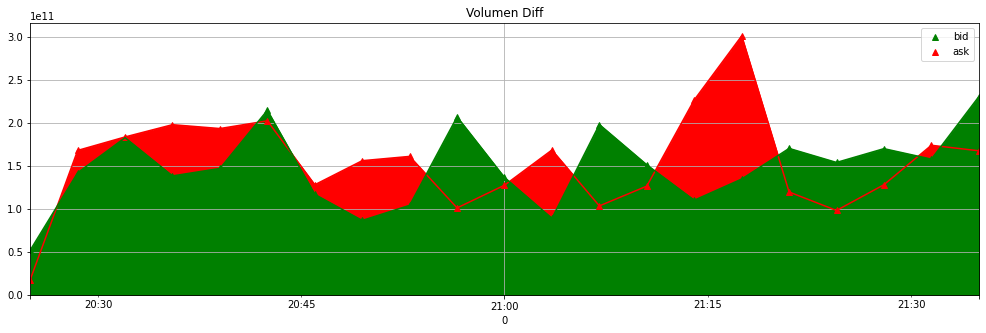

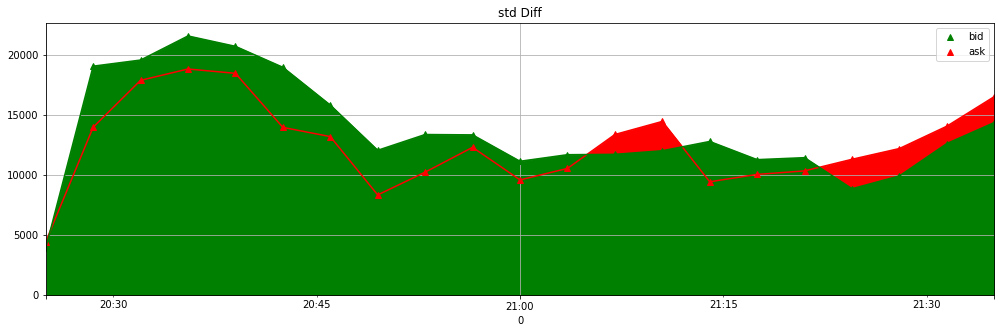

In [49]:
# data_10

ll = int(data_10.shape[0]*.0)
# nk = 
fig = plt.figure(figsize=(17, 5))
data_10['volb'][ll:-1].plot(color='green', style="^")
data_10['vola'][ll:-1].plot(color='red', style="^")
data_10['vola'][ll:-1].plot(color='red', kind='area')
data_10['volb'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("Volumen Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

cs = C[-1]
data_10 = df[cs].resample(f"{sp}s").sum()
data_10.columns = ['volb', 'vola', 'stdb', 'stda']
fig = plt.figure(figsize=(17, 5))
data_10['stdb'][ll:-1].plot(color='green', style="^")
data_10['stda'][ll:-1].plot(color='red', style="^")
data_10['stda'][ll:-1].plot(color='red', kind='area')
data_10['stdb'][ll:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')
plt.title("std Diff")
plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

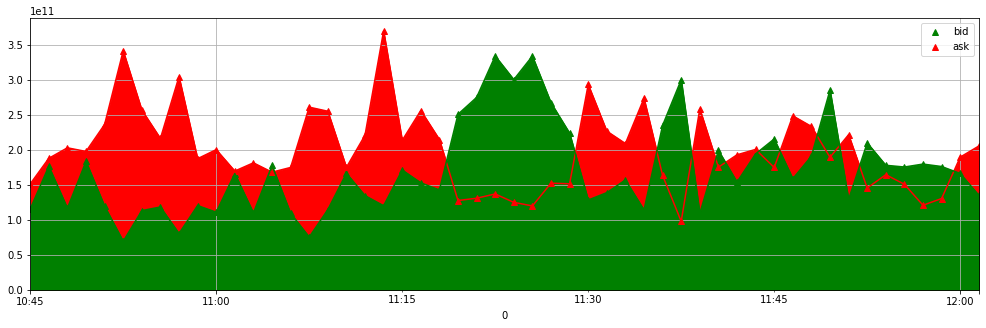

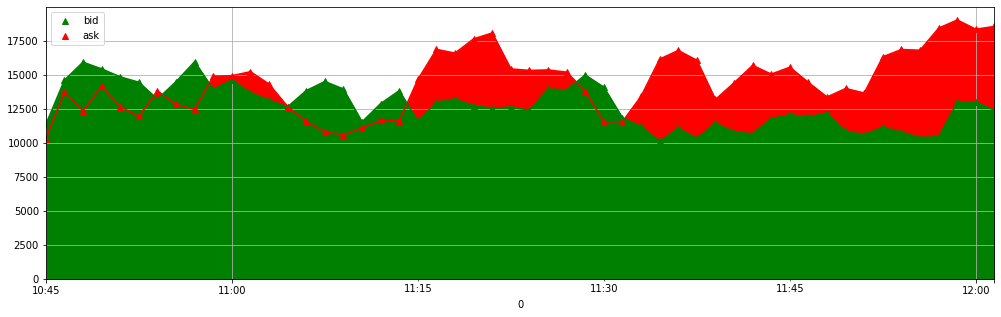

In [9]:
cs = C[0]
sp = 90
# sp = 150
data_10 = df[cs].resample(f"{sp}s").sum()
data_10.columns = ['volb', 'vola', 'stdb', 'stda']
# data_10

fig = plt.figure(figsize=(17, 5))
data_10['volb'][:-1].plot(color='green', style="^")
data_10['vola'][:-1].plot(color='red', style="^")
data_10['vola'][:-1].plot(color='red', kind='area')
data_10['volb'][:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')

plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

cs = C[-1]
data_10 = df[cs].resample(f"{sp}s").sum()
data_10.columns = ['volb', 'vola', 'stdb', 'stda']
fig = plt.figure(figsize=(17, 5))
data_10['stdb'][:-1].plot(color='green', style="^")
data_10['stda'][:-1].plot(color='red', style="^")
data_10['stda'][:-1].plot(color='red', kind='area')
data_10['stdb'][:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')

plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

In [225]:
data = df.resample("120s").sum()
# B_vol, A_vol, B_s, A_s

fig = plt.figure(figsize=(17, 5))
data['stdb'][:-1].plot(color='green', style="^")
data['stda'][:-1].plot(color='red', style="^")
data['stda'][:-1].plot(color='red', kind='area')
data['stdb'][:-1].plot(color='green', kind='area')
# data['stda'][:-1].plot(color='red')
# data['stdb'][:-1].plot(color='green')

plt.legend(['bid', "ask"])
# plt.ylim([0, 44000])
plt.grid()

KeyError: 'stdb'

<Figure size 1224x360 with 0 Axes>

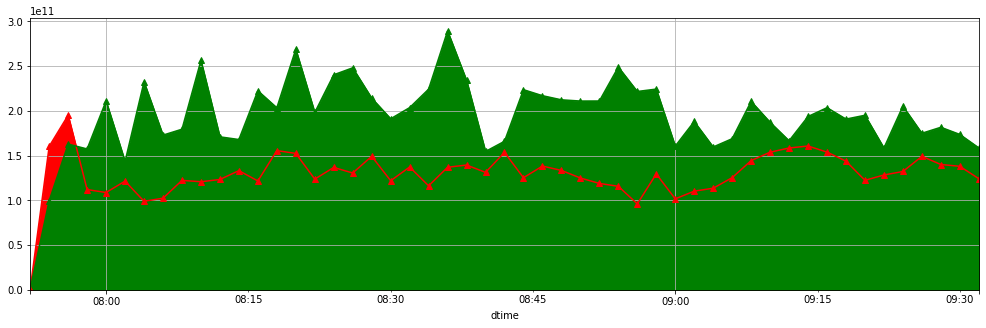

In [216]:
# data = df.resample("1s").sum()

fig = plt.figure(figsize=(17, 5))
# data['volb'][:-1].plot(color='green')
# data['volba'][:-1].plot(color='red')
data['volb'][:-1].plot(color='green', style="^")
data['volba'][:-1].plot(color='red', style="^")
data['volba'][:-1].plot(color='red', kind='area')
data['volb'][:-1].plot(color='green', kind='area')

plt.grid()

In [104]:
data.plot?

In [ ]:
data['stdb'][:-1].plot

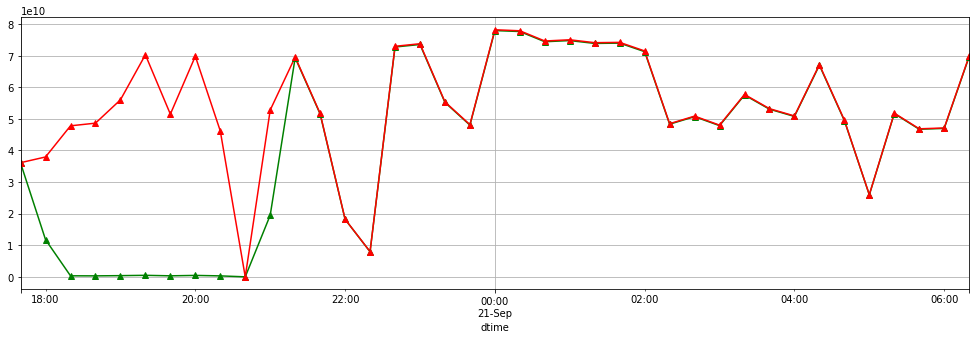

In [100]:
data = df.resample("20min").sum()

fig = plt.figure(figsize=(17, 5))
data['volb'][:-1].plot(color='green')
data['volba'][:-1].plot(color='red')
data['volb'][:-1].plot(color='green', style="^")
data['volba'][:-1].plot(color='red', style="^")
plt.grid()

In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.plot(data.index[:-1], data['stdb'][:-1], c='green')
plt.plot(data.index[:-1], data['stda'][:-1], c='red')
plt.plot(data.index[:-1], data['stdb'][:-1], "x", c='green')
plt.plot(data.index[:-1], data['stda'][:-1], "x", c='red')
plt.legend(['bid', "ask"])
plt.grid()

# fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
# ax[0].plot(data.index[:-1], data['volb'][:-1], c='green')
# ax[0].plot(data.index[:-1], data['volba'][:-1], c='red')
# ax[0].plot(data.index[:-1], data['volb'][:-1], "x", c='green')
# ax[0].plot(data.index[:-1], data['volba'][:-1], "x", c='red')

# ax[1].plot(data.index[:-1], data['stdb'][:-1], c='green')
# ax[1].plot(data.index[:-1], data['stda'][:-1], c='red')
# ax[1].plot(data.index[:-1], data['stdb'][:-1], "x", c='green')
# ax[1].plot(data.index[:-1], data['stda'][:-1], "x", c='red')

# ax[0].legend(['bid', 'ask'])
# ax[1].legend(['bid', 'ask'])

# ax[0].grid()
# ax[1].grid()

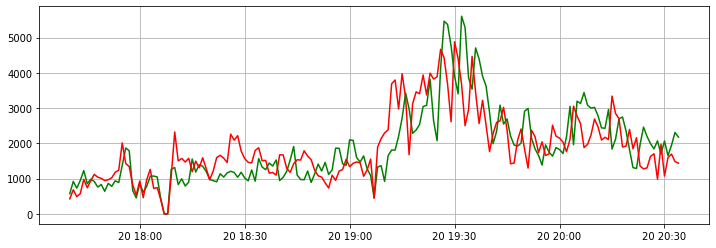

In [ ]:
while 1:
    df = pd.read_csv('data_book.csv', sep="|", low_memory=False, parse_dates =["dtime"], index_col ="dtime")
    df.index = pd.DatetimeIndex(pd.to_datetime(df.index, unit='ms')).tz_localize('UTC').tz_convert('America/Lima')
    # df
    
    data = df.resample("1min").sum()
    fig = plt.figure(figsize=(15, 4))
    plt.plot(data.index[:-1], data['stdb'][:-1], c='green')
    plt.plot(data.index[:-1], data['stda'][:-1], c='red')
    plt.plot(data.index[:-1], data['stdb'][:-1], "x", c='green')
    plt.plot(data.index[:-1], data['stda'][:-1], "x", c='red')
    plt.grid()
#     fig, ax = plt.subplots(2, 1, figsize=(15, 5), sharex=True)
#     datas["volb"].plot(ax=ax[0])   # potencia global activa
#     datas["volba"].plot(ax=ax[0])   # potencia global activa
#     datas["stdb"].plot(ax=ax[1]) # potencia global reactiva
#     datas["stda"].plot(ax=ax[1]) # potencia global reactiva

#     ax[0].legend(['bid', 'ask'])
#     ax[1].legend(['bid', 'ask'])

#     ax[0].grid()
#     ax[1].grid()
    # gap_8_5["Global_reactive_power"].plot(ax=ax[1], style="^")
    # gap_8_5["Global_active_power"].plot(ax=ax[0], style="^")
    plt.show()
    time.sleep(120)

In [16]:
from requests import get
import json
import numpy as np

In [4]:
text = get("https://api.cryptowat.ch/markets/binance/btcusdt/orderbook?depth=100").text
D = json.loads(text)
D

{'result': {'asks': [[42004.43, 0.59191],
   [42011.96, 0.04021],
   [42013.15, 0.11999],
   [42013.62, 0.21188],
   [42013.77, 0.11555],
   [42013.78, 0.33],
   [42015.76, 0.21188],
   [42017.67, 0.30679],
   [42019.21, 0.65785],
   [42019.22, 0.15144],
   [42019.72, 0.947],
   [42019.79, 0.781],
   [42021.17, 0.07419],
   [42021.18, 0.21184],
   [42021.57, 0.22143],
   [42021.79, 0.01608],
   [42021.9, 0.03],
   [42022.46, 0.04064],
   [42023.56, 0.32],
   [42023.78, 0.26726],
   [42023.79, 0.02],
   [42024.05, 0.74351],
   [42025.77, 0.14211],
   [42026.62, 0.01],
   [42026.68, 0.00691],
   [42026.78, 0.73268],
   [42026.79, 0.30036],
   [42026.87, 0.81299],
   [42026.91, 0.22173],
   [42029.66, 0.03],
   [42029.7, 0.00034],
   [42030.04, 0.00482],
   [42030.26, 0.2],
   [42030.32, 0.18808],
   [42030.95, 0.00374],
   [42031.33, 0.24934],
   [42031.34, 0.09],
   [42031.53, 0.46],
   [42032.17, 0.16217],
   [42033.27, 0.37621],
   [42033.28, 0.83288],
   [42033.52, 0.3],
   [42033.57

In [10]:
D.keys()

dict_keys(['result', 'allowance'])

In [9]:
D['allowance']

{'cost': 0.01,
 'remaining': 9.98,
 'upgrade': 'For unlimited API access, create an account at https://cryptowat.ch'}

In [12]:
ba = D['result']
ba

{'asks': [[42004.43, 0.59191],
  [42011.96, 0.04021],
  [42013.15, 0.11999],
  [42013.62, 0.21188],
  [42013.77, 0.11555],
  [42013.78, 0.33],
  [42015.76, 0.21188],
  [42017.67, 0.30679],
  [42019.21, 0.65785],
  [42019.22, 0.15144],
  [42019.72, 0.947],
  [42019.79, 0.781],
  [42021.17, 0.07419],
  [42021.18, 0.21184],
  [42021.57, 0.22143],
  [42021.79, 0.01608],
  [42021.9, 0.03],
  [42022.46, 0.04064],
  [42023.56, 0.32],
  [42023.78, 0.26726],
  [42023.79, 0.02],
  [42024.05, 0.74351],
  [42025.77, 0.14211],
  [42026.62, 0.01],
  [42026.68, 0.00691],
  [42026.78, 0.73268],
  [42026.79, 0.30036],
  [42026.87, 0.81299],
  [42026.91, 0.22173],
  [42029.66, 0.03],
  [42029.7, 0.00034],
  [42030.04, 0.00482],
  [42030.26, 0.2],
  [42030.32, 0.18808],
  [42030.95, 0.00374],
  [42031.33, 0.24934],
  [42031.34, 0.09],
  [42031.53, 0.46],
  [42032.17, 0.16217],
  [42033.27, 0.37621],
  [42033.28, 0.83288],
  [42033.52, 0.3],
  [42033.57, 0.13622],
  [42033.63, 0.15],
  [42033.88, 0.24195]

In [13]:
ba.keys()

dict_keys(['asks', 'bids', 'seqNum'])

In [14]:
ba['seqNum']

107394

In [17]:
B = np.array(ba['asks']).astype(np.float64)
B

array([[4.200443e+04, 5.919100e-01],
       [4.201196e+04, 4.021000e-02],
       [4.201315e+04, 1.199900e-01],
       [4.201362e+04, 2.118800e-01],
       [4.201377e+04, 1.155500e-01],
       [4.201378e+04, 3.300000e-01],
       [4.201576e+04, 2.118800e-01],
       [4.201767e+04, 3.067900e-01],
       [4.201921e+04, 6.578500e-01],
       [4.201922e+04, 1.514400e-01],
       [4.201972e+04, 9.470000e-01],
       [4.201979e+04, 7.810000e-01],
       [4.202117e+04, 7.419000e-02],
       [4.202118e+04, 2.118400e-01],
       [4.202157e+04, 2.214300e-01],
       [4.202179e+04, 1.608000e-02],
       [4.202190e+04, 3.000000e-02],
       [4.202246e+04, 4.064000e-02],
       [4.202356e+04, 3.200000e-01],
       [4.202378e+04, 2.672600e-01],
       [4.202379e+04, 2.000000e-02],
       [4.202405e+04, 7.435100e-01],
       [4.202577e+04, 1.421100e-01],
       [4.202662e+04, 1.000000e-02],
       [4.202668e+04, 6.910000e-03],
       [4.202678e+04, 7.326800e-01],
       [4.202679e+04, 3.003600e-01],
 

In [18]:
B.shape

(447, 2)